# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns which were conducted between May 2008 and November 2010. It recorded 79,354 contacts and an overall success rate of approximately 8% which represented 6,499 clients that opened a term deposit (the product being sold through the campaign) as a result of having been contacted through any one of the marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import time

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

###We can deduce from the preliminary EDA performed above the following:

1) There are 10 numerical features whose distribution will need to be investigated and whose influence over whether or not they significantly contribute to the prediction of the class into which the targetted client is likely to pertain to (whether they are likely to buy the invesment product or not) needs to be reviewed.

2) Correlation should be determined between numerical values and evaluated to determine if strongly correlated numerical features represent essentially the same thing and if any one of the numerical features can be discarded.

3) The numeric feature "duration" is recorded after the call has ended which is not known before the call to the targetted client is made, thus it is not helpful for predicting whether or not a client is likely to purchase the investment product. This feature should be discarded.

4) There are 10 categorical features of which, 3 seem to be binary in nature: "default", "housing" and "loan".

In [7]:
num_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['float64', 'int64']:
        num_column_lst.append(icol)
print(num_column_lst)

for name in num_column_lst:
    fig = px.box(df, x=name, title='Box Plot of ' + str(name) + ' numerical feature' )
    fig.show()


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


###The following was noted from the distribution of numerical features:

1) The distribution of the "campaign" feature is heavily left skewed.  Given that "campaign" represents the number of attempts to contact a targetted client the skewness might be attributed to the fact that most clients respond to the first, second attempts while others require numerous attempts to solicit a response.

2) The distribution of the "pday" feature is heavily right skewed.  The majority of the values for this feature are the same - 999 (over 75%).  This feature should be discarded.

3) The distribution of the "previous" feature is left skewed.  The majority of the values for this feature are the same - 0 (over 75%).  This feature should be discarded.

4) As mentioned above, "duration" should be discarded given that it will not help predict the classification of targetted clients.

###Analysis of numerical feature correlation

Text(0.5, 1.0, 'Correlation Matrix of the numerical features')

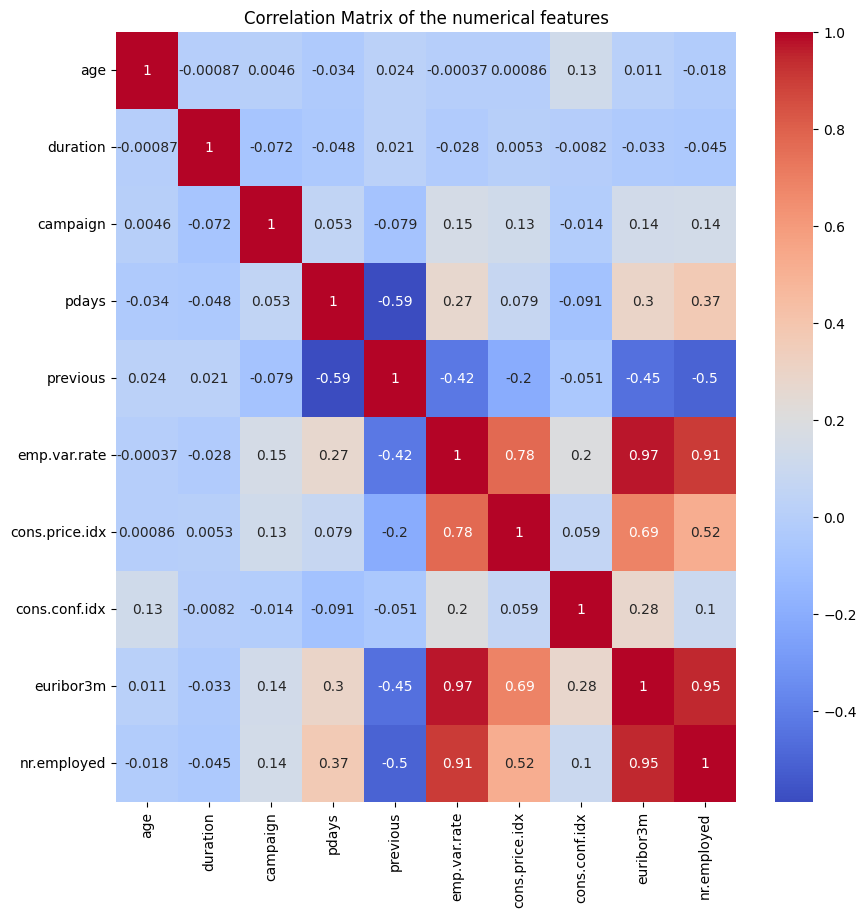

In [7]:
plt.figure(figsize=(10, 10))
numerical_values_df = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
sns.heatmap(numerical_values_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the numerical features')

<Figure size 1000x1000 with 0 Axes>

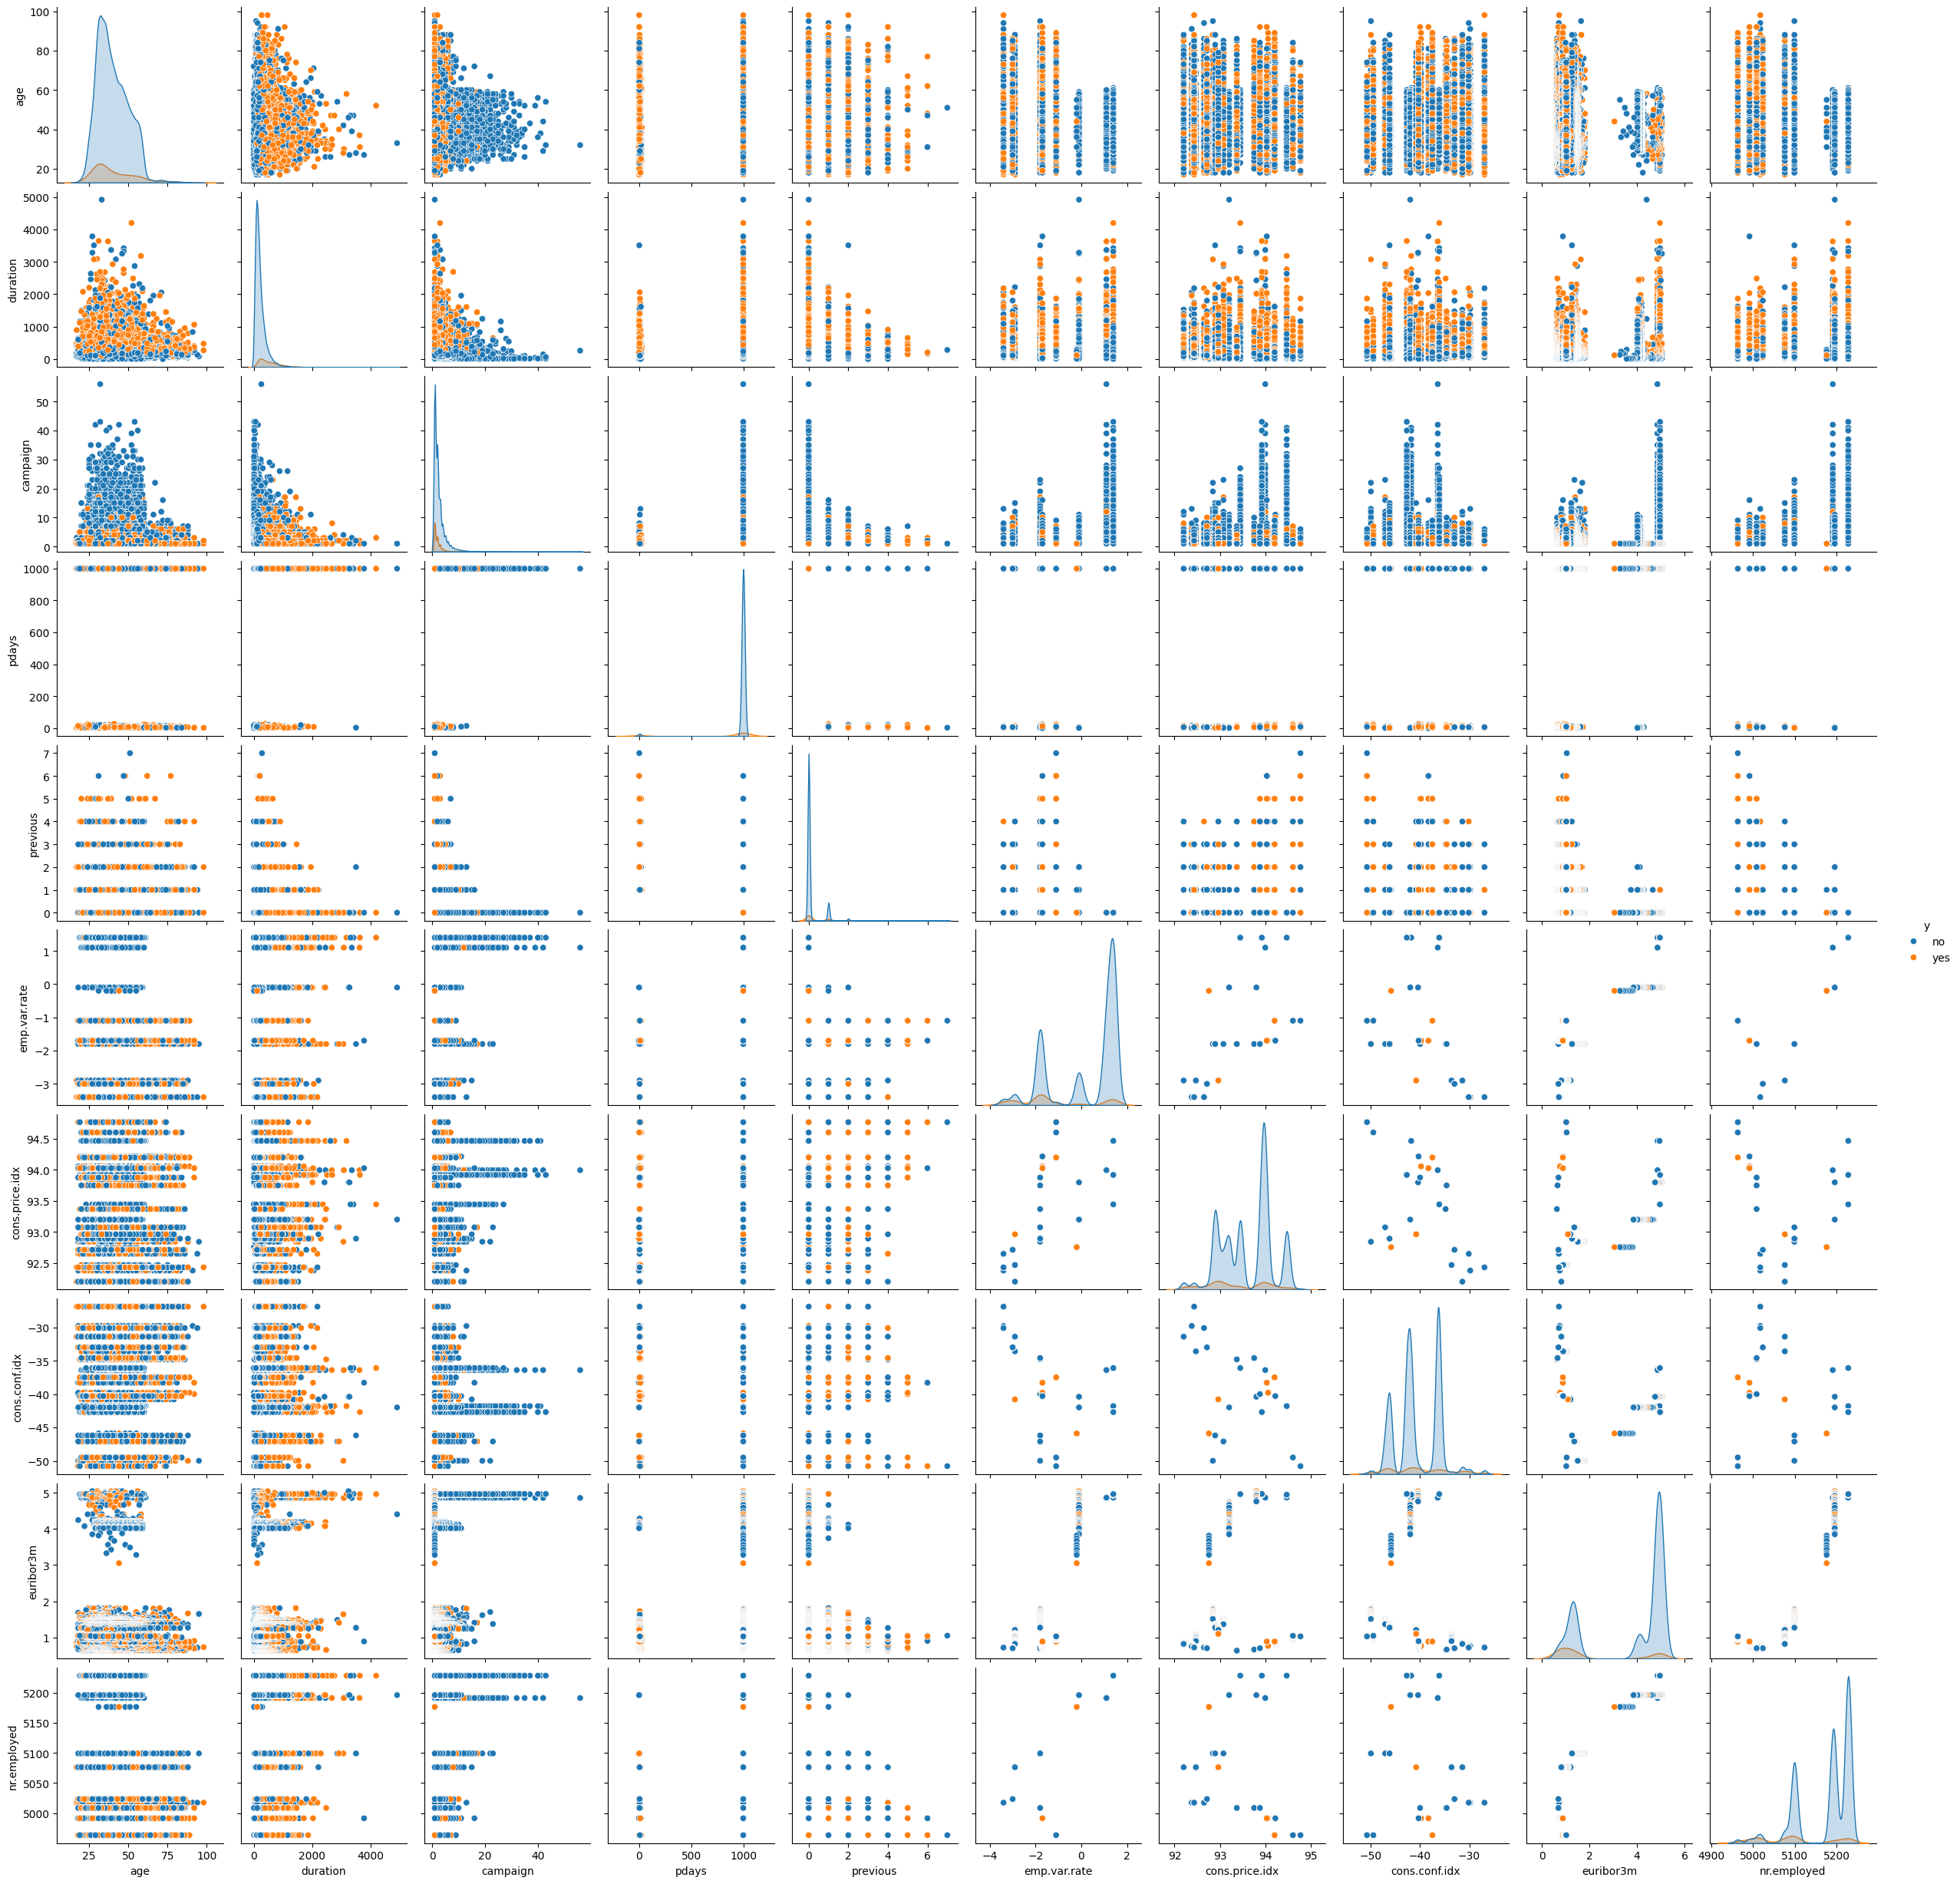

In [8]:
numerical_values_df2 = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
plt.figure(figsize=(10, 10))
sns.pairplot(data=numerical_values_df2, hue='y')

Highly Correlatied Variables:

1) "nr.employed" and "emp.var.rate" seem to be highly correlated.  One of these features seems to be used as an input to the other.  "nr.employed" will be discarded given its relationship to "emp.var.rate".

###Categorical Features EDA:

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Text(0.5, 1.05, 'Distribution of Categorical variables')

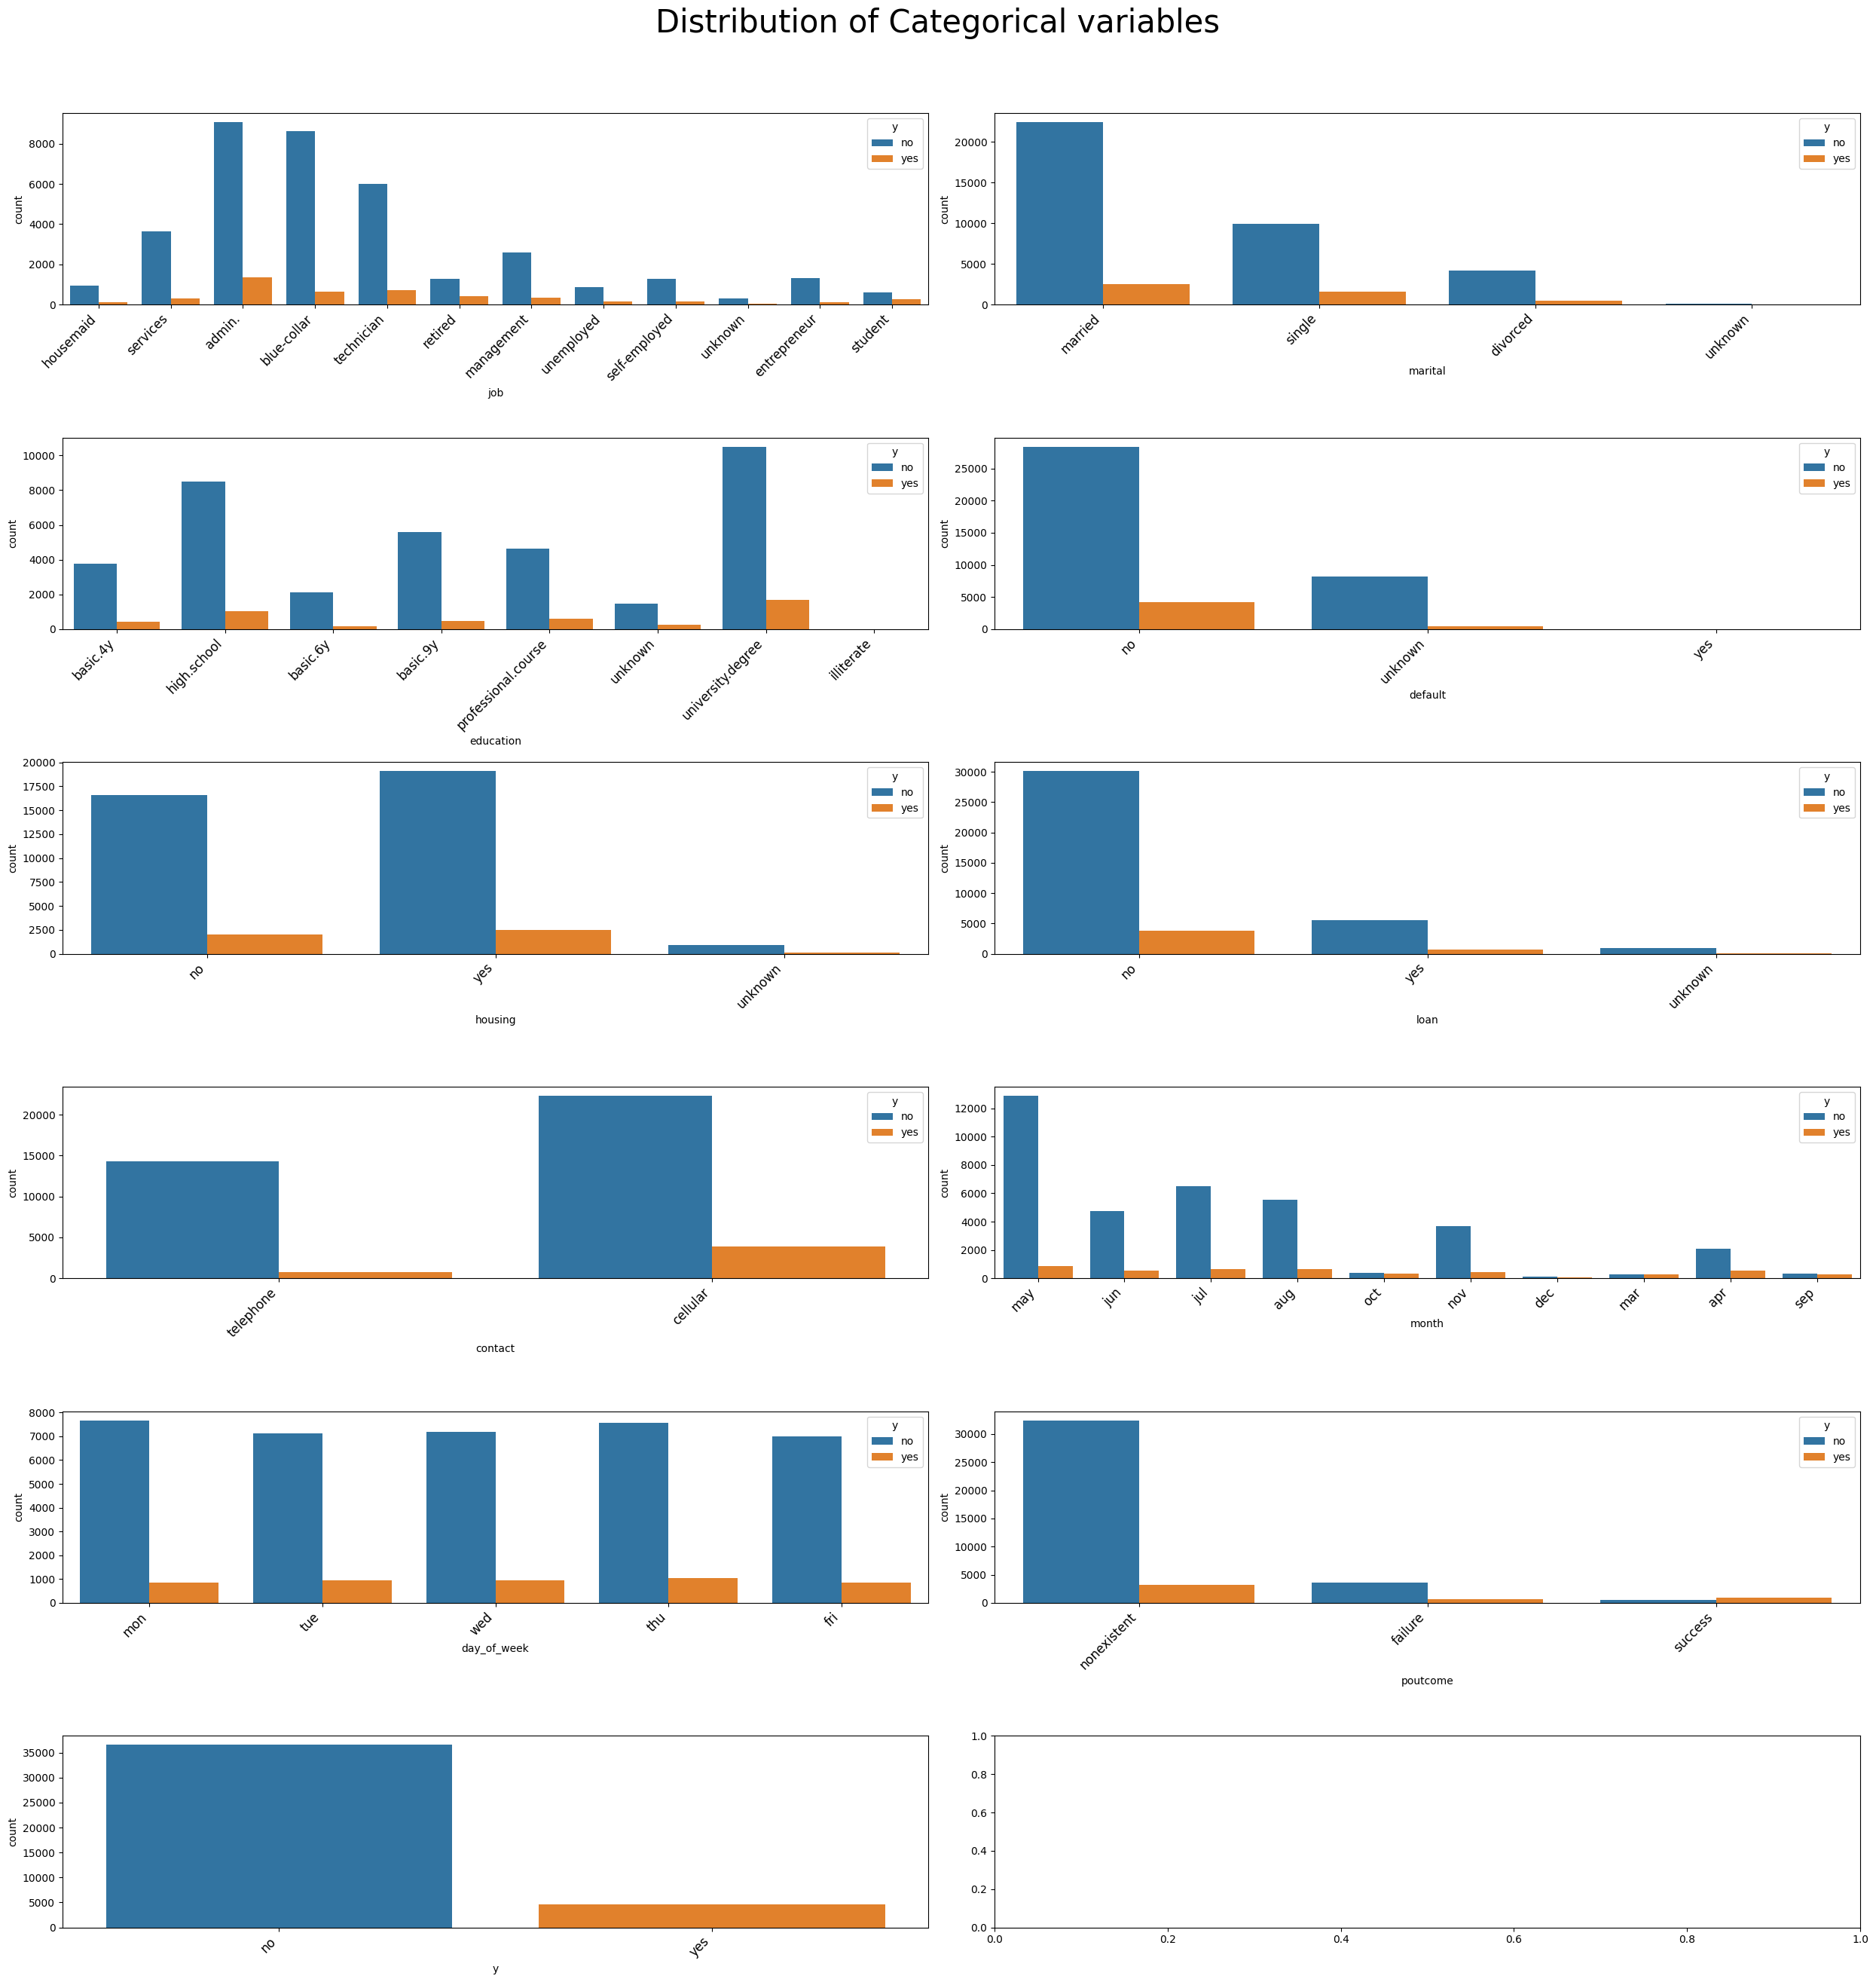

In [9]:
cat_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['object']:
        cat_column_lst.append(icol)
print(cat_column_lst)

fig, axs = plt.subplots(nrows = 6, ncols=2, figsize = (25,25))
for name,ax in zip(cat_column_lst,axs.flatten()):
    sns.countplot(data=df,x=name,ax=ax,hue='y')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)

fig.tight_layout()
fig.suptitle('Distribution of Categorical variables',y=1.05,fontsize=30)

Noted the following with regards to categorical variables:

1) 'marital' has almost no unknown datapoints. Married people have the lowest acceptance rate of all three categories.

2) Admin, blue-collar and technician represent a large proportion of the data for the 'job' feature.

3) university graduates represent a large proportion of the values for the 'education' feature.

4) 'housing' - most targetted clients have a house.

5) 'loan' -  most targetted clients have no loans.

6) 'contact' - most targetted clients were contacted through cellphones

7) 'month' - most targetted clients were contacted in May. While targetted clients contacted in the months of October, December, March and September almost all accepted the offer. This may provide an important interpretation the relationship for the classification model.


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

###Business Objective:
The business objective consist of leveraging the dataet supplied by a portuguese bank regarding past direct marketing campaigns to create a model which the bank can use to predict the success of furture marketing campaigns. Various models will be trained and tested against a dataset of 17 historical campaigns with over 79,354 targetted clients. The success in this case is defined as the number of tagetted clients who accepted to buy the investment product being offered within the campaign (a long-term deposit with good interest rates).

To do so, we will compare the scores of the following classification models after training and testing each one with standardized, encoded data:

*   K-nearest neighbors (KNN)
*   Logistic Regression (LR)
*   Decision Trees (DT)
*   Support Verctor Machines (SVM)





### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
#Create dataframe with chosen features
chosen_features_df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'y']].copy()

print(chosen_features_df.shape)
chosen_features_df.head()

(41188, 9)


age        job  marital    education  default housing loan    contact   y
0   56  housemaid  married     basic.4y       no      no   no  telephone  no
1   57   services  married  high.school  unknown      no   no  telephone  no
2   37   services  married  high.school       no     yes   no  telephone  no
3   40     admin.  married     basic.6y       no      no   no  telephone  no
4   56   services  married  high.school       no      no  yes  telephone  no

In [11]:
#Clean and one hot encode the data
chosen_features_df = pd.get_dummies(chosen_features_df, columns=['job', 'marital', 'education', 'contact'], drop_first=True)
chosen_features_df['y'] = chosen_features_df['y'].map({'yes': 1, 'no': 0})
chosen_features_df['housing'] = chosen_features_df['housing'].map({'yes': 1, 'no': 0})
chosen_features_df['default'] = chosen_features_df['default'].map({'yes': 1, 'no': 0})
chosen_features_df['loan'] = chosen_features_df['loan'].map({'yes': 1, 'no': 0})
chosen_features_df.dropna(inplace=True)
chosen_features_df.head()


age  default  housing  loan  y  job_blue-collar  job_entrepreneur  \
0   56      0.0      0.0   0.0  0            False             False   
2   37      0.0      1.0   0.0  0            False             False   
3   40      0.0      0.0   0.0  0            False             False   
4   56      0.0      0.0   1.0  0            False             False   
6   59      0.0      0.0   0.0  0            False             False   

   job_housemaid  job_management  job_retired  ...  marital_single  \
0           True           False        False  ...           False   
2          False           False        False  ...           False   
3          False           False        False  ...           False   
4          False           False        False  ...           False   
6          False           False        False  ...           False   

   marital_unknown  education_basic.6y  education_basic.9y  \
0            False               False               False   
2            False               False               False   
3            False                True               False   
4            False               False               False   
6            False               False               False   

   education_high.school  education_illiterate  education_professional.course  \
0                  False                 False                          False   
2                   True                 False                          False   
3                  False                 False                          False   
4                   True                 False                          False   
6                  False                 False                           True   

   education_university.degree  education_unknown  contact_telephone  
0                        False              False               True  
2                        False              False               True  
3                        False              False               True  
4                        False              False               True  
6                        False              False               True  

[5 rows x 27 columns]

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
X = chosen_features_df.drop('y', axis=1)
y = chosen_features_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [46]:
# Using a DummyClassifier with 'Most Frequent' or the mode as the prediction


dummy_clf = DummyClassifier(strategy = 'most_frequent')
start = time.time()
dummy_clf.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['Baseline_Model', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5541
           1       0.00      0.00      0.00       825

    accuracy                           0.87      6366
   macro avg       0.44      0.50      0.47      6366
weighted avg       0.76      0.87      0.81      6366

ROC_AUC Score for Baseline = 0.5
False Positive Rates:  [0. 1.]
True Positive Rates:  [0. 1.]


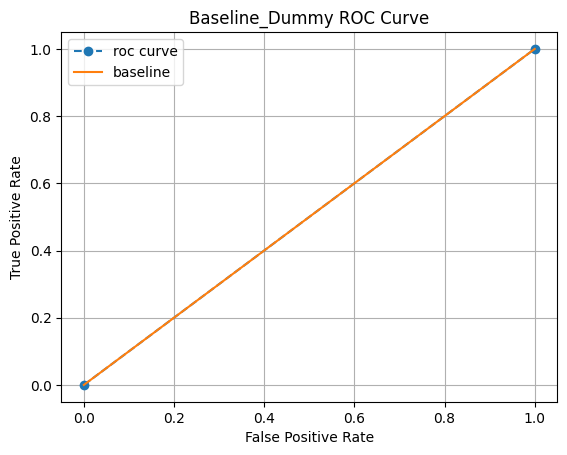

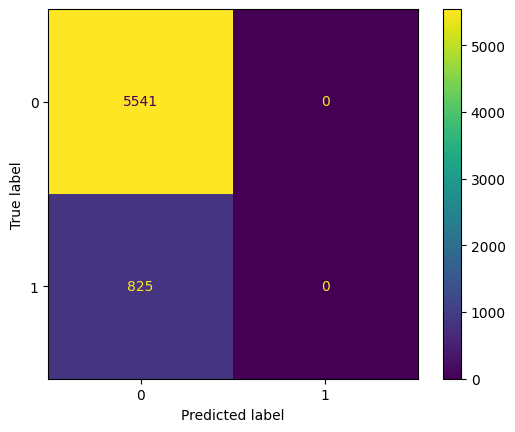

In [47]:
# Standardized Print out for all relevant scores and performance metrics

y_hat = dummy_clf.predict(X_test)
y_hat_probs = dummy_clf.predict_proba(X_test)


baseline_scores = classification_report(y_test, y_hat)
print(baseline_scores)

baseline_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for Baseline = {baseline_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Baseline_Dummy ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['Baseline_Model', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'ROC_AUC'] = baseline_roc_score
results_df.loc['Baseline_Model', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'Recall'] = recall_score(y_test, y_hat)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
# Create transformaer to scale data
""" For the exception of age, all the columns are categorical and are non-binary (except y).
The features 'job','marital','education','default','housing' and 'loan' are not ordinal.
Hence, we will create a transformer using OneHotEncoder and fit it to the Dataframe"""

column_transformer = make_column_transformer(
    ([StandardScaler(), ['age']]),

    remainder='passthrough'
)


column_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(), ['age'])])

In [48]:
# Simple Logistic Regression without parameter optimization
## Begin by column transform X_train & X_test
X_train_simple = column_transformer.transform(X_train)
X_test_simple = column_transformer.transform(X_test)

simple_lgr = LogisticRegression()

start = time.time()
simple_lgr.fit(X_train_simple, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['Simple_lgr', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5541
           1       0.00      0.00      0.00       825

    accuracy                           0.87      6366
   macro avg       0.44      0.50      0.47      6366
weighted avg       0.76      0.87      0.81      6366

ROC_AUC Score for Simple Logistic Regressor = 0.6581920996647581
False Positive Rates:  [0.         0.00018047 0.00054142 0.00054142 0.00090236]
True Positive Rates:  [0.         0.         0.         0.00363636 0.00363636]


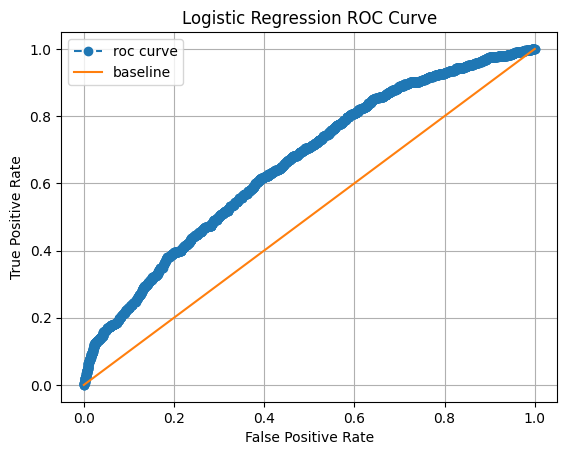

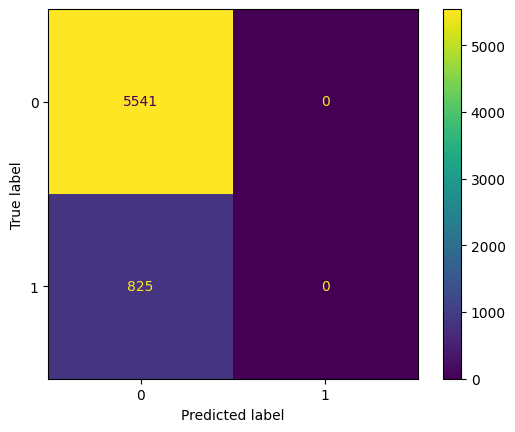

In [49]:
# print out all relevant scores and performance metrics

y_hat = simple_lgr.predict(X_test_simple)
y_hat_probs = simple_lgr.predict_proba(X_test_simple)

simple_lgr_scores = classification_report(y_test, y_hat)
print(simple_lgr_scores)

simple_lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for Simple Logistic Regressor = {simple_lgr_roc_score}')


# display roc graph and confusion matrix
fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['Simple_lgr', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'ROC_AUC'] = simple_lgr_roc_score
results_df.loc['Simple_lgr', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'Recall'] = recall_score(y_test, y_hat)

### Problem 9: Score the Model

What is the accuracy of your model?

In order to determine the accuracy of our model(s), we must first measure this accuracy within the context of the business objective(s) which are being targetted through this exercise.  The bank's main bussiness objctive is increase the efficiency of its sales campaigns in regards to its financial products and increase the likelihood that targetted clients are going to purchase such financial products.  

Clearly, the best metric to predict which targetted clients are truely likely to buy the banks financial products is AUC_ROC.  The AUC plots the False Positive Rate (FPR) against the True Positive Rate (TPR). This measure will track the number of clients the model missidentifies as buyers of the financial product (false positive) while maximizing the true buyers of the financial product.

Additionally, the Accuracy, F1, Precision and Recall will be measured in order to better understand the overall performance of each model.  Furthermore, we will also collect the run time of each model to better track the tradeoff of accuracy vs time.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

We have already built a baseline model and a simple logistic regression. Next, we will create more complex models using grid search to optimize their parameters.

We will perform the following:

*   Logistic regression: The parameters will be the penalty and different class weight.
*   KNN: The parameters will be n_neighbors, p and weights
*   SVM: The parameters will be degree, kernel and class weight
*   Dtree: The parameters will be max_depth, min samples split, min sample leag and criterion

We will begin by creating our dataframe tracking all the necessary results and will append our results as our analysis evolves

In [45]:
# create a df to keep track of scores and training time

results_df = pd.DataFrame({'Baseline_Model': [],
                            'Simple_lgr': [],
                            'logistic_regression': [],
                           'knn': [],
                           'svm': [],
                           'dtree': []},
                          columns=['ROC_AUC','Accuracy', 'F1', 'Precision', 'Recall', 'Fit Time'])

In [50]:
results_df

ROC_AUC  Accuracy   F1 Precision Recall Fit Time
Baseline_Model       0.5  0.870405  0.0       0.0    0.0     0.0s
Simple_lgr      0.658192  0.870405  0.0       0.0    0.0    0.16s

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

###Logistic Regression with GridSearch

In [29]:
# grid search params
lgr_params = {'lgr__penalty': ['l1', 'l2', 'elasticnet']}

# pipeline which includes column transfomer, followed by model
lgr_pipe = Pipeline([
    ('columns', column_transformer),
    ('lgr', LogisticRegression(class_weight='balanced'))
])

# Create the grid search, train it and time it
lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params, scoring='roc_auc')

start = time.time()
lgr_grid.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['logistic_regression', 'Fit Time'] = fit_time

Best parameters for Logistic Regression found during grid search={'lgr__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      5541
           1       0.18      0.68      0.29       825

    accuracy                           0.56      6366
   macro avg       0.55      0.61      0.48      6366
weighted avg       0.82      0.56      0.63      6366

ROC_AUC Score for best Logistic Regressor = 0.6597047901866526
False Positive Rates:  [0.         0.00018047 0.00054142 0.00054142 0.00090236]
True Positive Rates:  [0.         0.         0.         0.00363636 0.00363636]


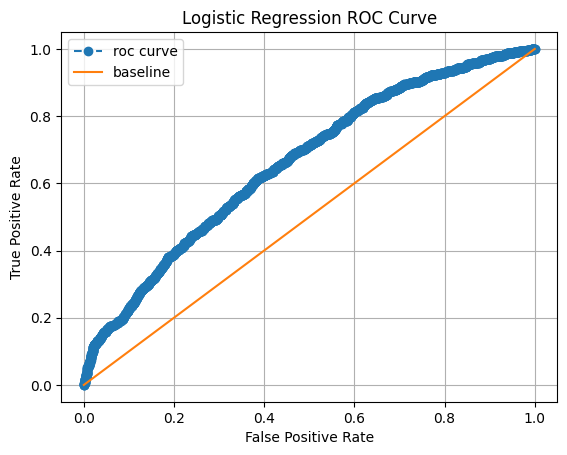

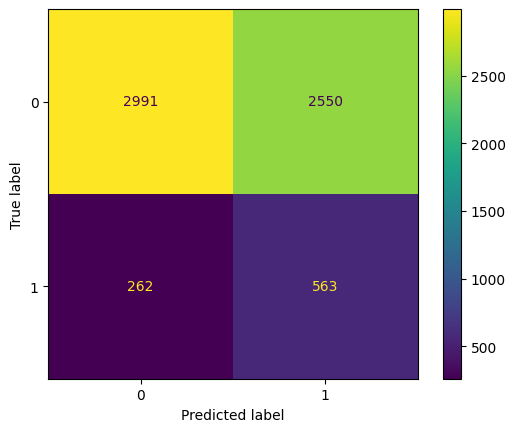

In [30]:
# print out all relevant scores and performance metrics

print(f'Best parameters for Logistic Regression found during grid search={lgr_grid.best_params_}')

y_hat = lgr_grid.predict(X_test)
y_hat_probs = lgr_grid.predict_proba(X_test)

lgr_scores = classification_report(y_test, y_hat)
print(lgr_scores)

lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best Logistic Regressor = {lgr_roc_score}')


# display roc graph and confusion matrix
fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['logistic_regression', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['logistic_regression', 'ROC_AUC'] = lgr_roc_score
results_df.loc['logistic_regression', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['logistic_regression', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['logistic_regression', 'Recall'] = recall_score(y_test, y_hat)

###KNN with GridSearch

In [32]:
# params for grid search

knn_params = {'knn__n_neighbors': list(range(1,10,1)),
              'knn__p': [1,2,3],
              'knn__weights': ['uniform', 'distance']}

# pipeline which includes column transfomer, followed by model
knn_pipe = Pipeline([
    ('columns', column_transformer),
    ('knn', KNeighborsClassifier())
])

# Create the grid search, train it and time it
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, scoring='roc_auc')


#Time the fitting of the model
start = time.time()
knn_grid.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['knn', 'Fit Time'] = fit_time

Best parameters for knn found during grid search={'knn__n_neighbors': 9, 'knn__p': 3, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5541
           1       0.42      0.05      0.09       825

    accuracy                           0.87      6366
   macro avg       0.65      0.52      0.51      6366
weighted avg       0.82      0.87      0.82      6366

ROC_AUC Score for best KNN = 0.6230101775743356
False Positive Rates:  [0.         0.00018047 0.00072189 0.00342898 0.01028695]
True Positive Rates:  [0.         0.00242424 0.01212121 0.0230303  0.04969697]


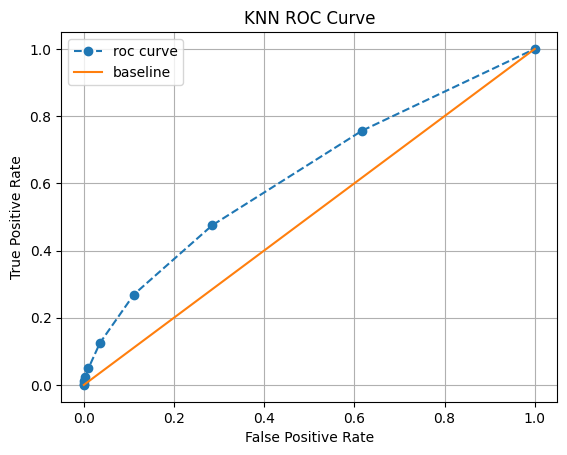

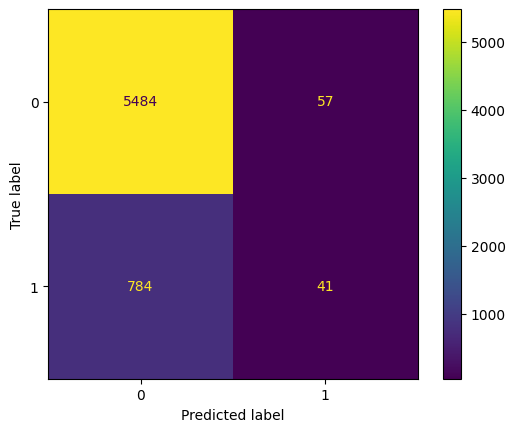

In [33]:
# print out all relevant scores and performance metrics

print(f'Best parameters for knn found during grid search={knn_grid.best_params_}')

y_hat = knn_grid.predict(X_test)
y_hat_probs = knn_grid.predict_proba(X_test)

knn_scores = classification_report(y_test, y_hat)
print(knn_scores)

knn_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best KNN = {knn_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['knn', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['knn', 'ROC_AUC'] = knn_roc_score
results_df.loc['knn', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['knn', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['knn', 'Recall'] = recall_score(y_test, y_hat)

###SVM & GridSearch taking random sample of the orginal dataset

In [35]:
# for SVM we will use smaller samples of the data
'''Since we have over 50,000 observation for SVM we will reduce our sample to a random sample of 5,000'''
import numpy

chosen_features_df_svc = chosen_features_df.sample(5000, random_state = 42)

#Create the train and test dataset from the sample
X_svc = chosen_features_df_svc.drop(columns = 'y')
y_svc = chosen_features_df_svc['y']

X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, random_state = 42)

In [36]:
# params for grid search
svc_params = {'svc__kernel': ['poly', 'rbf', 'sigmoid'],
              'svc__degree': list(range(1, 4, 1)),
              'svc__gamma': [1,0.1,0.01,0.001],
              'svc__C': [0.1,1,10,100]}


# pipeline which includes column transfomer, followed by model
svc_pipe = Pipeline([
    ('columns', column_transformer),
    ('svc', SVC(class_weight='balanced', probability=True))
])


# Create the grid search, train it and time it
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_params, scoring='roc_auc')


#Time the fitting of the model
start = time.time()
svc_grid.fit(X_train_svc, y_train_svc)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['svm', 'Fit Time'] = fit_time

Best parameters for SVM found during grid search={'svc__C': 100, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.92      0.42      0.57      1086
           1       0.16      0.75      0.27       164

    accuracy                           0.46      1250
   macro avg       0.54      0.58      0.42      1250
weighted avg       0.82      0.46      0.53      1250

ROC_AUC Score for best svm = 0.6418918160176077
False Positive Rates:  [0.         0.         0.00184162 0.00552486 0.01289134]
True Positive Rates:  [0.         0.01219512 0.0304878  0.03658537 0.04268293]


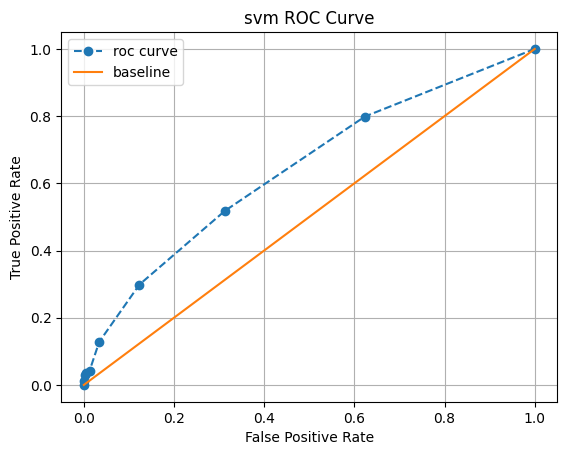

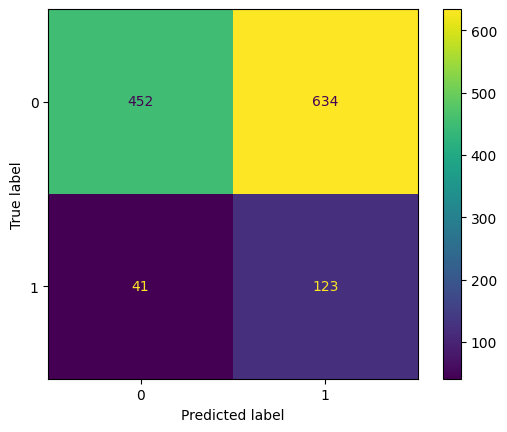

In [37]:
# print out all relevant scores and performance metrics

print(f'Best parameters for SVM found during grid search={svc_grid.best_params_}')

y_hat = svc_grid.predict(X_test_svc)
y_hat_probs = knn_grid.predict_proba(X_test_svc)

svc_scores = classification_report(y_test_svc, y_hat)
print(svc_scores)

svc_roc_score = roc_auc_score(y_test_svc, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best svm = {svc_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test_svc, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('svm ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test_svc, y_hat)

# add key results to results_df
results_df.loc['svm', 'Accuracy'] = accuracy_score(y_test_svc, y_hat)
results_df.loc['svm', 'ROC_AUC'] = svc_roc_score
results_df.loc['svm', 'F1'] = f1_score(y_test_svc, y_hat)
results_df.loc['svm', 'Precision'] = precision_score(y_test_svc, y_hat)
results_df.loc['svm', 'Recall'] = recall_score(y_test_svc, y_hat)

###Decision Tree with GridSearch

In [39]:
# params for grid search

dtree_params = {'dtree__max_depth': list(range(1, 11, 2)),
                'dtree__min_samples_split': list(range(2, 21, 1)),
                'dtree__criterion': ['entropy', 'gini'],
                'dtree__min_samples_leaf': list(range(2, 21, 2))}

# pipeline which includes column transfomer, followed by model
dtree_pipe = Pipeline([
    ('columns', column_transformer),
    ('dtree', DecisionTreeClassifier())
])

# Create the grid search, train it and time it
dtree_grid = GridSearchCV(dtree_pipe, param_grid=dtree_params, scoring='roc_auc')


#Time the fitting of the model
start = time.time()
dtree_grid.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['dtree', 'Fit Time'] = fit_time

Best parameters for Decision Tree found during grid search={'dtree__criterion': 'entropy', 'dtree__max_depth': 7, 'dtree__min_samples_leaf': 20, 'dtree__min_samples_split': 7}
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5541
           1       0.43      0.05      0.09       825

    accuracy                           0.87      6366
   macro avg       0.65      0.52      0.51      6366
weighted avg       0.82      0.87      0.82      6366

ROC_AUC Score for best decision tree = 0.6660514183524472
False Positive Rates:  [0.         0.00054142 0.0019852  0.00270709 0.00415088]
True Positive Rates:  [0.         0.00242424 0.00969697 0.01090909 0.01454545]


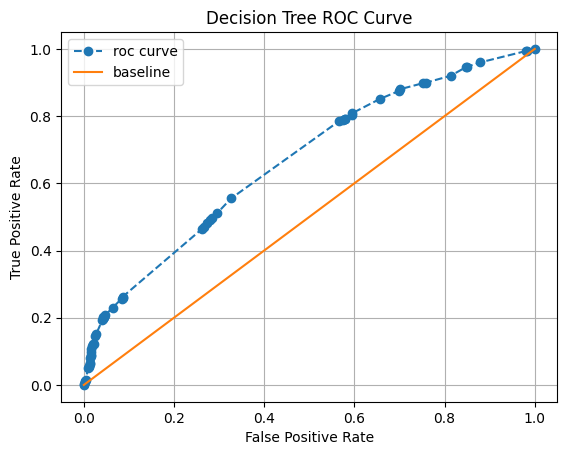

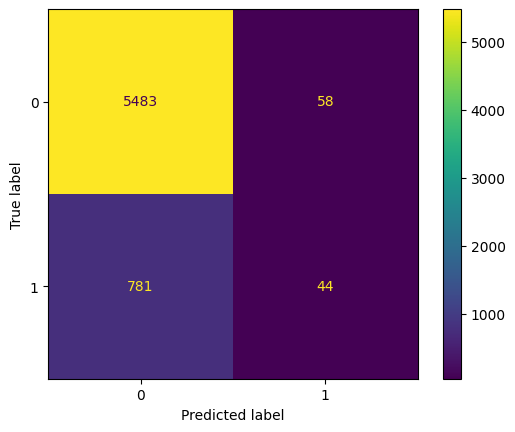

In [40]:
# print out all relevant scores and performance metrics

print(f'Best parameters for Decision Tree found during grid search={dtree_grid.best_params_}')

y_hat = dtree_grid.predict(X_test)
y_hat_probs = dtree_grid.predict_proba(X_test)

dtree_scores = classification_report(y_test, y_hat)
print(dtree_scores)

dtree_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best decision tree = {dtree_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['dtree', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['dtree', 'ROC_AUC'] = dtree_roc_score
results_df.loc['dtree', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['dtree', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['dtree', 'Recall'] = recall_score(y_test, y_hat)

###Final Model Comparison

In [43]:
results_df

ROC_AUC  Accuracy        F1 Precision    Recall  \
Baseline_Model            0.5  0.870405       0.0       0.0       0.0   
Simple_lgr           0.658192  0.870405       0.0       0.0       0.0   
logistic_regression  0.659705  0.558278  0.285932  0.180854  0.682424   
knn                   0.62301  0.867892  0.088841  0.418367  0.049697   
svm                  0.641892      0.46  0.267101  0.162483      0.75   
dtree                0.666051  0.868206   0.09493  0.431373  0.053333   

                      Fit Time  
Baseline_Model            0.0s  
Simple_lgr                0.5s  
logistic_regression      1.69s  
knn                   4037.53s  
svm                  13697.49s  
dtree                  850.04s

### Findings and conclusions

The overall business objective for this ML exercise was to build classification model that would help our client, the Portuguese bank, better predict which of its targetted customers are likely to purchase investment products being promoted within the bank's many marketing campaigns.  In order to accruately measure the mdoels' results in the context of the chosen business objective, the AUC_ROC curve was used as the primary metric because the AUC plots fales positive rate against the true positive rate^1.  The AUC metric will show the number of customers which were classified as potential purchasers and which in turn did purchase the investment product (True Positives) versus the number of customers that were also classified as potential purchasers who did not end up purchasing the investment product (False Positives).  This approach will enable us to focus on minimizing False Positives which in turn would waste less of the bank's resources and time in regards to the execution of its marketing campaigns.

Additionally, it is important to recognize that the dataset is not balanced with regards to the two classes (values within the "y" column).  There are many more "No" or '0' than "Yes" or '1'.  This imbalance requires the use of a metric which combines both "precision" and "recall" hince the inclusion of F1 as a metric to measure performance according to class.

Model comparison with regards to chosen metrics and performance:

Assuming all customers would not purchase the investment product specified in the campaign the baseline model showed a 87% accuracy for "No" and a ROC_AUC of .5.  Models subsequently used should provide better accuracy than 13% and a ROC_AUC higher than .5.

####Simple Logistic Regression
The confusion matrix showed for the simple logistic model showed the same results as the baseline model classifying all predictions as "no", hence this model can be discarded.

####Logistic Regression with GridSearch
The logistic regression model with grid search on hyperparameters showed a slightly higher ROC_AUC score than simple Logistic Regression without grid search.  The accuracy score was much lower than the simple Logistic Regression model however, its confusion matrix shows a clear pattern with regards to prediction and it showed the best F1 score out of all of the models tested.  Furthermore, the logistic regression model with grid search also had the shortest fit time so training it does not require an abundance of resources.

####KNN with GridSearch
The KNN with GridSearch of hyperparameters did not yield good results.  First, the ROC_AUC score was below the threshold set by the baseline model.  Second, it took some time to train the model which demonstrated its inefficiency.

####SVM with GridSearch
SVM with GridSearch of hyperparameters was training on a subset of the orginal dataset which consisted of 5000 random samples.  This was the most inefficient model as it took the longest to train.  Also, its ROC_AUC score was below the threshold set by the baseline model.

####Decision Tree with GridSearch
The decision tree with GridSearch had a slightly better ROC_AUC score than the logistic regression model with GridSearch however, its F1 score was really low.  Furthermore, it took more time to train then the logistic regression model with GridSearch.

####Conclusion
The best model to use to acheive the stated business objective would be the Logistic Regression model with Ridge Regression (l2).  This model shows the highest F1 score and can be trained with few resources.


####References
1. Moro, Sérgio & Cortez, Paulo & Laureano, Raul. (2011). Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. Proceedings of the European Simulation and Modelling Conference